In [120]:
import importlib
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import pipeline as pp
import stats_hc as hc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
importlib.reload(hc)
Stat = hc.Statistics("../datasets/sample/dataset.csv")

['worldwid', 'laser', 'technolog', 'market', 'analysi', 'report', '<date>', 'challeng', 'opportun', 'headlin', 'bitcoin', 'blockchain', 'search', 'exceed', 'trump', '!', 'blockchain', 'stock', 'next', '!', 'new', 'market', 'research', 'report', 'laser', 'technolog', 'market', 'type', 'solid', 'yag', 'laser', 'fiber', 'laser', 'thin', 'disk', 'laser', 'liquid', 'ga', 'argon', 'ion', 'laser', 'excim', 'co', '<num>', 'other', 'applic', 'medic', 'industri', 'militari', 'research', 'consum', 'other', 'geographi', 'trend', 'forecast', '<date>', '<date>', 'add', '<url>', 'laser', 'light', 'amplif', 'simul', 'emiss', 'radiat', 'technolog', 'use', 'forvari', 'applic', 'medic', 'industri', 'militari', 'research', 'commerci', 'consum', 'automot', 'commun', 'purpos', 'applic', 'either', 'scientificlaboratori', 'experi', 'measurementexplor', 'distanc', 'laser', 'becom', 'robust', 'compact', 'versatil', 'technolog', 'develop', 'develop', 'trigger', 'commerci', 'industri', 'applic', 'laser', 'technol

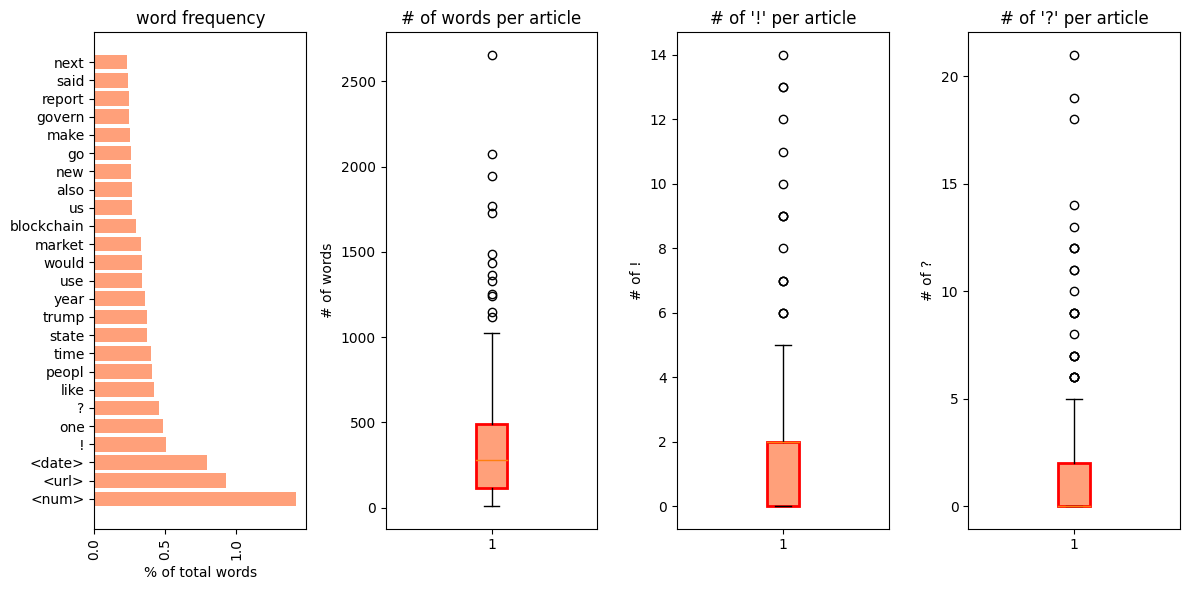

In [122]:
Stat.plot_combined()

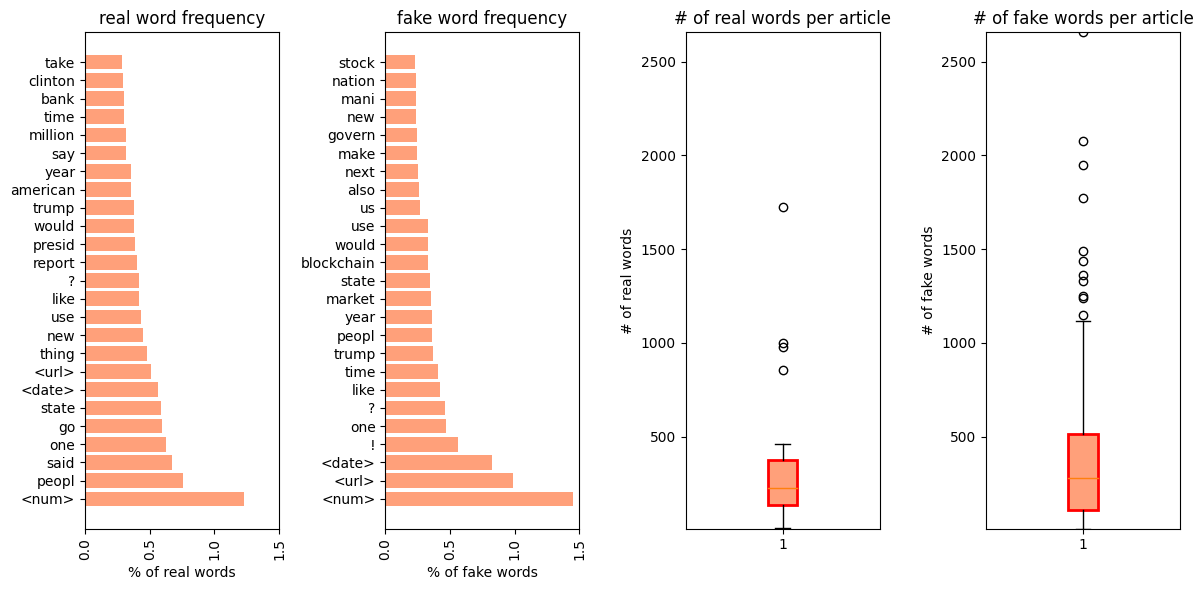

In [123]:
Stat.plot_combined_fake_vs_real()

d:\projects\FakeNews\src\stats_hc.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xlabel(label)


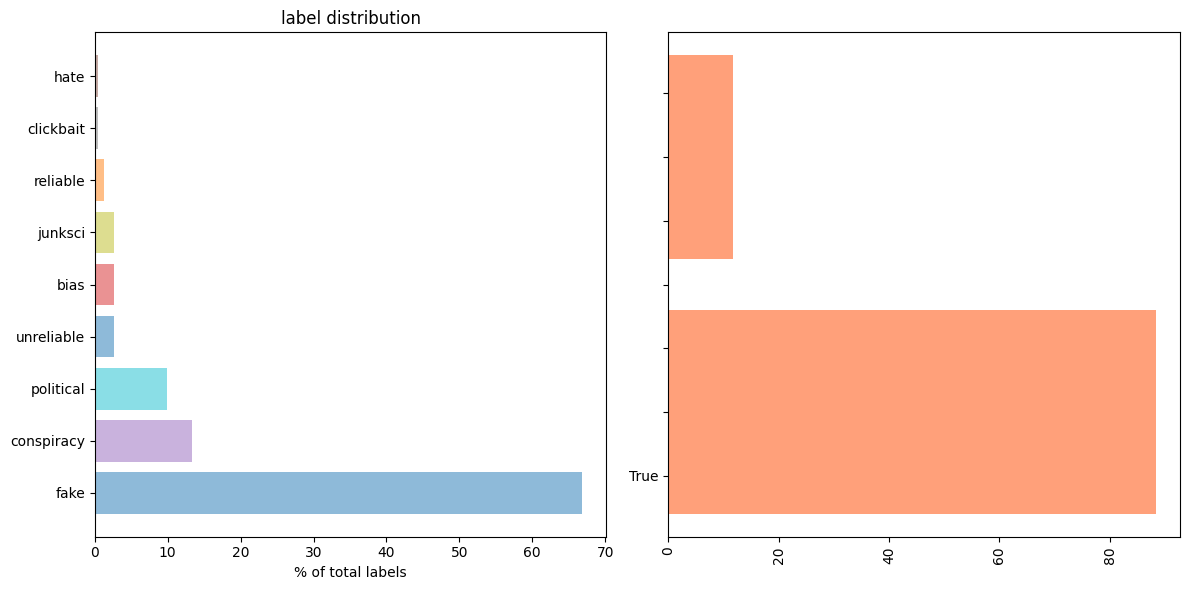

In [124]:
Stat.plot_combined_type_fake_vs_real()


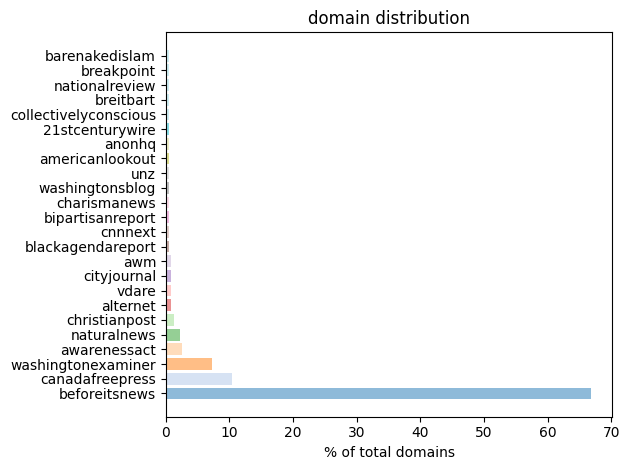

In [125]:
Stat.barplot_domain_distribution(percentage = True)

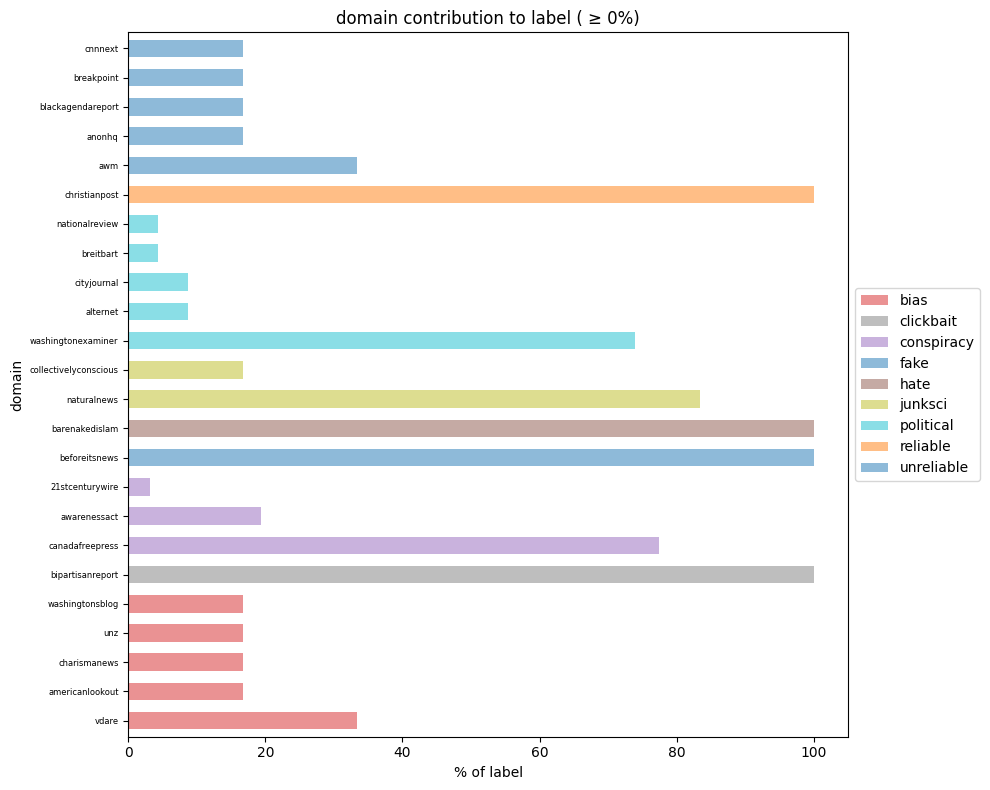

In [126]:
Stat.barplot_domain_contribution(threshold=0, percentage=True)

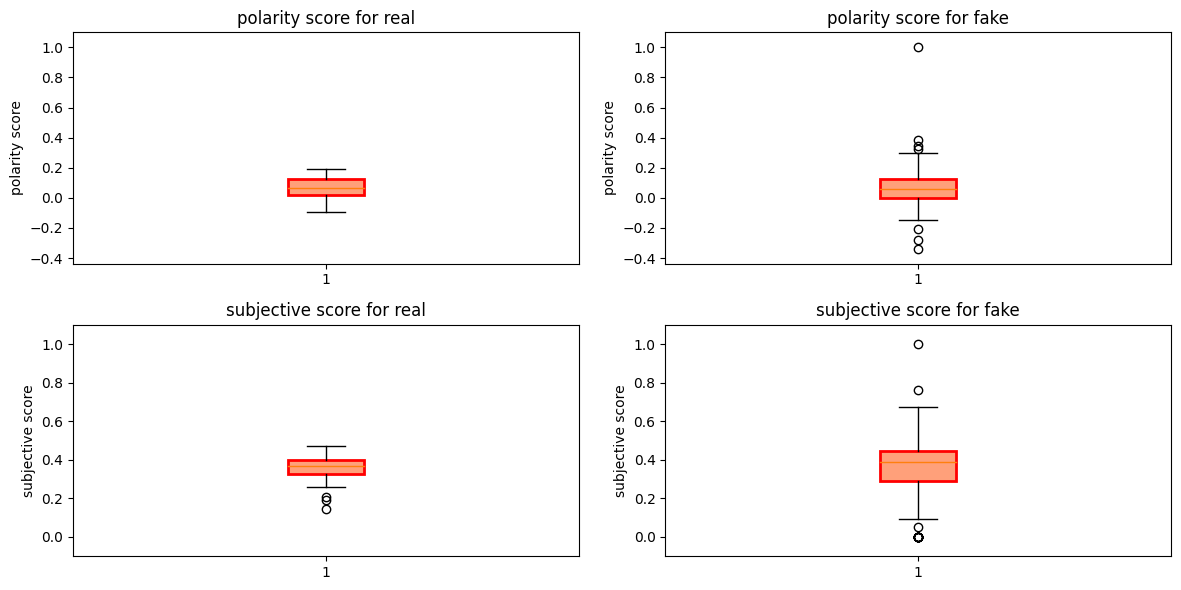

In [127]:
Stat.plot_combined_sentence_analysis()